# IMT 511 PS 05: data programming

In [9]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read data

read in the data file 'weatherHistory.csv.bz2'.  Understand it's
structure.  Consult the companion text file for a brief variable
descriptions.

inspect a few lines of the data and find the number of rows and columns

Hint: use pd.sample(), pd.head(), pd.tail()

In [10]:
weather = pd.read_csv('weatherHistory.csv')

print(weather.columns)
print(weather.shape)
print(weather.index)


Index(['time', 'summary', 'precip', 'temp', 'appTemp', 'humidity', 'wind',
       'bearing', 'visibility', 'cloudCover', 'pressumre', 'dailySummary'],
      dtype='object')
(96453, 12)
RangeIndex(start=0, stop=96453, step=1)


## Select 2015 observations only

Select only observations for 2015.

Hint: 'time' is of a string data type (well, it is a Series of
string).  Use string methods to select 2015 data only.

Hint2: you have to use `.str` attribute to get a string out of series.

Hint3: don't just make a subset, make a copy of subset.

Find how many observations are there for 2015 only.

In [11]:
w = weather[weather.time.str.startswith('2015')].copy()

print(w)

print(w.shape)


                                time                   summary precip  \
78909  2015-04-01 00:00:00.000 +0200                  Overcast   rain   
78910  2015-04-01 01:00:00.000 +0200       Breezy and Overcast   rain   
78911  2015-04-01 02:00:00.000 +0200                  Overcast   rain   
78912  2015-04-01 03:00:00.000 +0200                  Overcast   rain   
78913  2015-04-01 04:00:00.000 +0200                  Overcast   rain   
78914  2015-04-01 05:00:00.000 +0200             Mostly Cloudy   rain   
78915  2015-04-01 06:00:00.000 +0200             Mostly Cloudy   rain   
78916  2015-04-01 07:00:00.000 +0200             Partly Cloudy   rain   
78917  2015-04-01 08:00:00.000 +0200             Mostly Cloudy   rain   
78918  2015-04-01 09:00:00.000 +0200             Mostly Cloudy   rain   
78919  2015-04-01 10:00:00.000 +0200  Breezy and Partly Cloudy   rain   
78920  2015-04-01 11:00:00.000 +0200             Partly Cloudy   rain   
78921  2015-04-01 12:00:00.000 +0200  Breezy and Pa

## Create a new variable 'timestamp' which is variable 'time'
## converted to datetime type

Hint: use Pandas.to_datetime
(code given, adjust variable names)

In [12]:
w['timestamp'] = pd.to_datetime(w.time)

timestamp = w['timestamp']
print(timestamp)



78909    2015-04-01 00:00:00+02:00
78910    2015-04-01 01:00:00+02:00
78911    2015-04-01 02:00:00+02:00
78912    2015-04-01 03:00:00+02:00
78913    2015-04-01 04:00:00+02:00
78914    2015-04-01 05:00:00+02:00
78915    2015-04-01 06:00:00+02:00
78916    2015-04-01 07:00:00+02:00
78917    2015-04-01 08:00:00+02:00
78918    2015-04-01 09:00:00+02:00
78919    2015-04-01 10:00:00+02:00
78920    2015-04-01 11:00:00+02:00
78921    2015-04-01 12:00:00+02:00
78922    2015-04-01 13:00:00+02:00
78923    2015-04-01 14:00:00+02:00
78924    2015-04-01 15:00:00+02:00
78925    2015-04-01 16:00:00+02:00
78926    2015-04-01 17:00:00+02:00
78927    2015-04-01 18:00:00+02:00
78928    2015-04-01 19:00:00+02:00
78929    2015-04-01 20:00:00+02:00
78930    2015-04-01 21:00:00+02:00
78931    2015-04-01 22:00:00+02:00
78932    2015-04-01 23:00:00+02:00
78933    2015-04-10 00:00:00+02:00
78934    2015-04-10 01:00:00+02:00
78935    2015-04-10 02:00:00+02:00
78936    2015-04-10 03:00:00+02:00
78937    2015-04-10 

## Sort data by date

This data is in an arbitrary order.  Ensure it is ordered by time

Hint: use Pandas.sort_values method

In [13]:
tsp = w.sort_values('timestamp', ascending=False)
print(tsp)

                                time        summary precip       temp  \
80972  2015-12-31 23:00:00.000 +0100          Clear   snow  -6.827778   
80971  2015-12-31 22:00:00.000 +0100          Clear   snow  -6.205556   
80970  2015-12-31 21:00:00.000 +0100          Clear   snow  -5.250000   
80969  2015-12-31 20:00:00.000 +0100          Clear   snow  -4.233333   
80968  2015-12-31 19:00:00.000 +0100          Clear   snow  -4.238889   
80967  2015-12-31 18:00:00.000 +0100          Clear   snow  -4.027778   
80966  2015-12-31 17:00:00.000 +0100  Partly Cloudy   snow  -2.894444   
80965  2015-12-31 16:00:00.000 +0100  Partly Cloudy   snow  -2.150000   
80964  2015-12-31 15:00:00.000 +0100  Partly Cloudy   snow  -1.155556   
80963  2015-12-31 14:00:00.000 +0100  Partly Cloudy   snow  -0.094444   
80962  2015-12-31 13:00:00.000 +0100  Partly Cloudy   snow  -0.144444   
80961  2015-12-31 12:00:00.000 +0100  Partly Cloudy   snow  -1.088889   
80960  2015-12-31 11:00:00.000 +0100  Partly Cloudy

# Noon temperature only

Select a subset from your 2015 data that only contains data for noon
(12:00:00).

Hint: you can either find a string, corresponding to noon, in the
string variable 'time', or extract hour from the timestamp like this:
`w15.timestamp.apply(lambda x: x.hour)`
This example code creates a variable that is only the hour (0-23).

In [21]:
w15noon = tsp[tsp.time.str.contains(' 12:00:00', regex=False)].copy()
print(w15noon.shape)
print(w15noon.head(5))


(365, 13)
                                time        summary precip      temp  \
80961  2015-12-31 12:00:00.000 +0100  Partly Cloudy   snow -1.088889   
80937  2015-12-30 12:00:00.000 +0100  Partly Cloudy   rain  1.133333   
80889  2015-12-29 12:00:00.000 +0100       Overcast   rain  2.344444   
80865  2015-12-28 12:00:00.000 +0100          Foggy   snow -0.022222   
80841  2015-12-27 12:00:00.000 +0100          Foggy   rain  2.155556   

        appTemp  humidity     wind  bearing  visibility  cloudCover  \
80961 -4.394444      0.63   9.2897    147.0     16.1000         0.0   
80937 -4.438889      0.58  25.0677     30.0     10.2557         0.0   
80889 -1.816667      0.99  16.8889     21.0      8.1305         0.0   
80865 -0.022222      0.92   3.1717    222.0      0.0322         0.0   
80841 -0.461111      0.92   8.9838    340.0      0.1610         0.0   

       pressumre                                       dailySummary  \
80961    1036.00  Partly cloudy starting in the morning con

# make a plot

Make a plot that depicts the temperature through 2015
Add a descriptive title, label the axis.  Use a good font size. 
Use a non-default line color for the plot.

                                time        summary precip       temp  \
80972  2015-12-31 23:00:00.000 +0100          Clear   snow  -6.827778   
80971  2015-12-31 22:00:00.000 +0100          Clear   snow  -6.205556   
80970  2015-12-31 21:00:00.000 +0100          Clear   snow  -5.250000   
80969  2015-12-31 20:00:00.000 +0100          Clear   snow  -4.233333   
80968  2015-12-31 19:00:00.000 +0100          Clear   snow  -4.238889   
80967  2015-12-31 18:00:00.000 +0100          Clear   snow  -4.027778   
80966  2015-12-31 17:00:00.000 +0100  Partly Cloudy   snow  -2.894444   
80965  2015-12-31 16:00:00.000 +0100  Partly Cloudy   snow  -2.150000   
80964  2015-12-31 15:00:00.000 +0100  Partly Cloudy   snow  -1.155556   
80963  2015-12-31 14:00:00.000 +0100  Partly Cloudy   snow  -0.094444   
80962  2015-12-31 13:00:00.000 +0100  Partly Cloudy   snow  -0.144444   
80961  2015-12-31 12:00:00.000 +0100  Partly Cloudy   snow  -1.088889   
80960  2015-12-31 11:00:00.000 +0100  Partly Cloudy

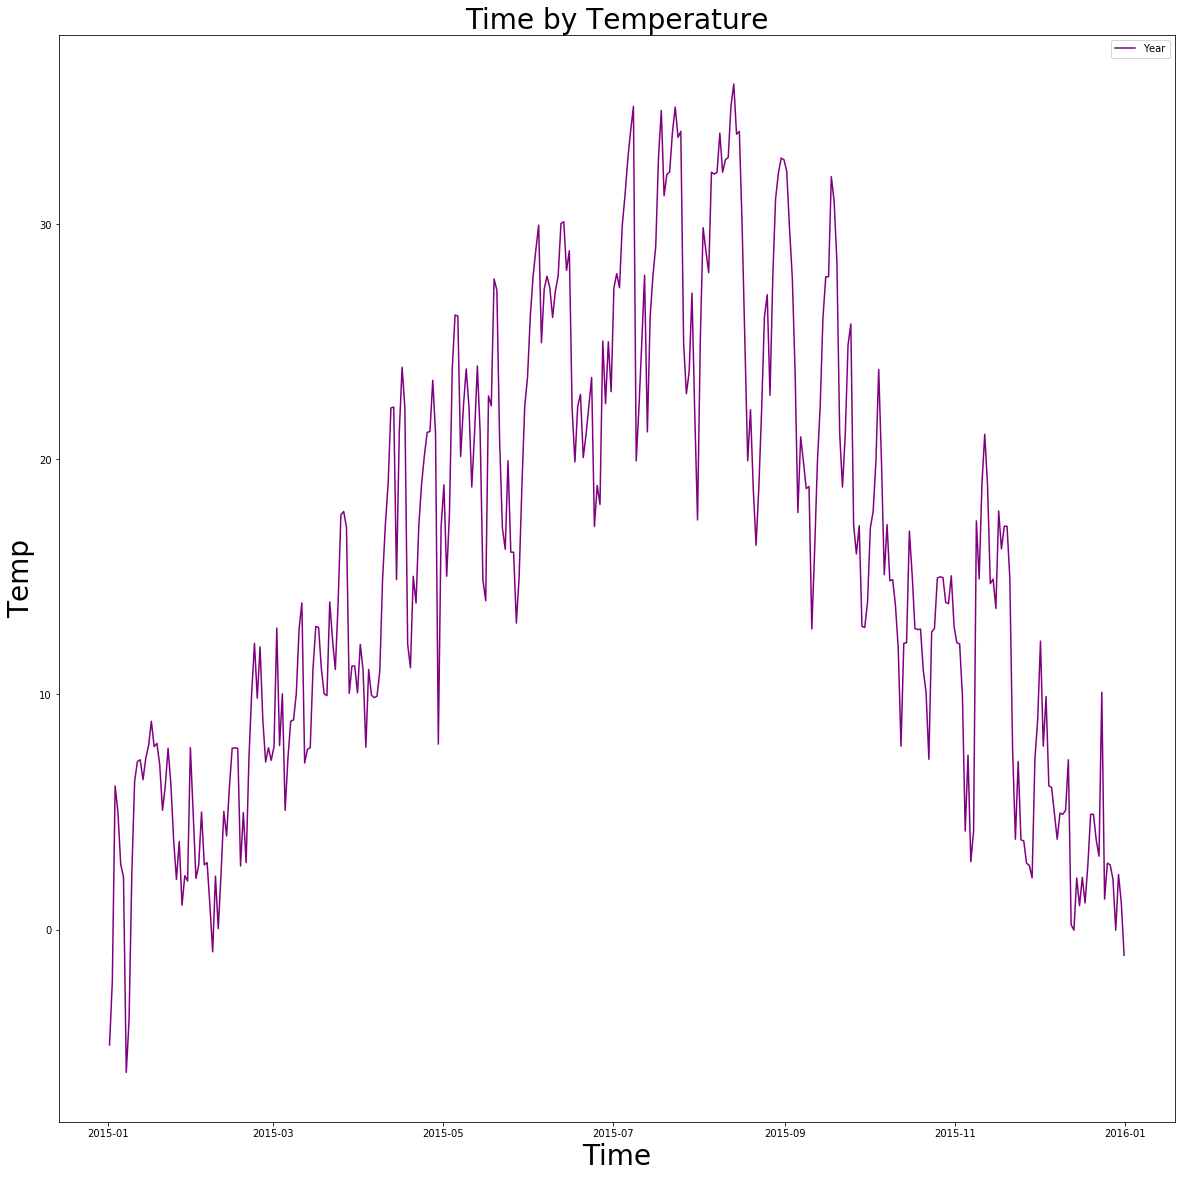

In [24]:
plt.figure(figsize=(20,20))
plt.plot(w15noon.timestamp, w15noon.temp, color ='purple', label = "Year")
plt.title('Time by Temperature', {'fontsize':28})
plt.xlabel('Time',{'fontsize':28})
plt.ylabel('Temp',{'fontsize':28})
plt.legend()
